In [1]:
import os
import geoviews as gv

from eolearn.core import EOPatch, FeatureType

In [14]:
data_folder = os.path.join('..','tiler','data','2021H','patches', 'ГПН-2013-19')
eopatch = EOPatch.load(data_folder)
eopatch

EOPatch(
  data: {
    L2A: numpy.ndarray(shape=(19, 64, 64, 13), dtype=float32)
  }
  mask: {
    CLD: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    CLM: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    CLP: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    IS_DATA: numpy.ndarray(shape=(19, 64, 64, 1), dtype=bool)
    SCL: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    SNW: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.05
    resolution: 10
    size_x: 64
    size_y: 64
    time_difference: datetime.timedelta(seconds=3600)
    time_interval: (datetime.datetime(2021, 1, 1, 0, 0), datetime.datetime(2021, 12, 31, 23, 59, 59))
  }
  bbox: BBox(((74.24258391419684, 62.93770001727495), (74.25504509880022, 62.94351081948182)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2021, 2, 12, 6, 5

In [7]:
import matplotlib.pyplot as plt
import os
import geoviews as gv

from eolearn.core import EOPatch, FeatureType
import numpy as np
import cv2

EOPatch(
  data: {
    L2A: numpy.ndarray(shape=(30, 64, 64, 13), dtype=float32)
  }
  mask: {
    CLD: numpy.ndarray(shape=(30, 64, 64, 1), dtype=uint8)
    CLM: numpy.ndarray(shape=(30, 64, 64, 1), dtype=uint8)
    CLP: numpy.ndarray(shape=(30, 64, 64, 1), dtype=uint8)
    IS_DATA: numpy.ndarray(shape=(30, 64, 64, 1), dtype=bool)
    SCL: numpy.ndarray(shape=(30, 64, 64, 1), dtype=uint8)
    SNW: numpy.ndarray(shape=(30, 64, 64, 1), dtype=uint8)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.05
    resolution: 10
    size_x: 64
    size_y: 64
    time_difference: datetime.timedelta(seconds=3600)
    time_interval: (datetime.datetime(2021, 1, 1, 0, 0), datetime.datetime(2021, 12, 31, 23, 59, 59))
  }
  bbox: BBox(((66.16206412311386, 61.9284828271635), (66.17370935583982, 61.93447135217377)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2021, 1, 29, 7, 12

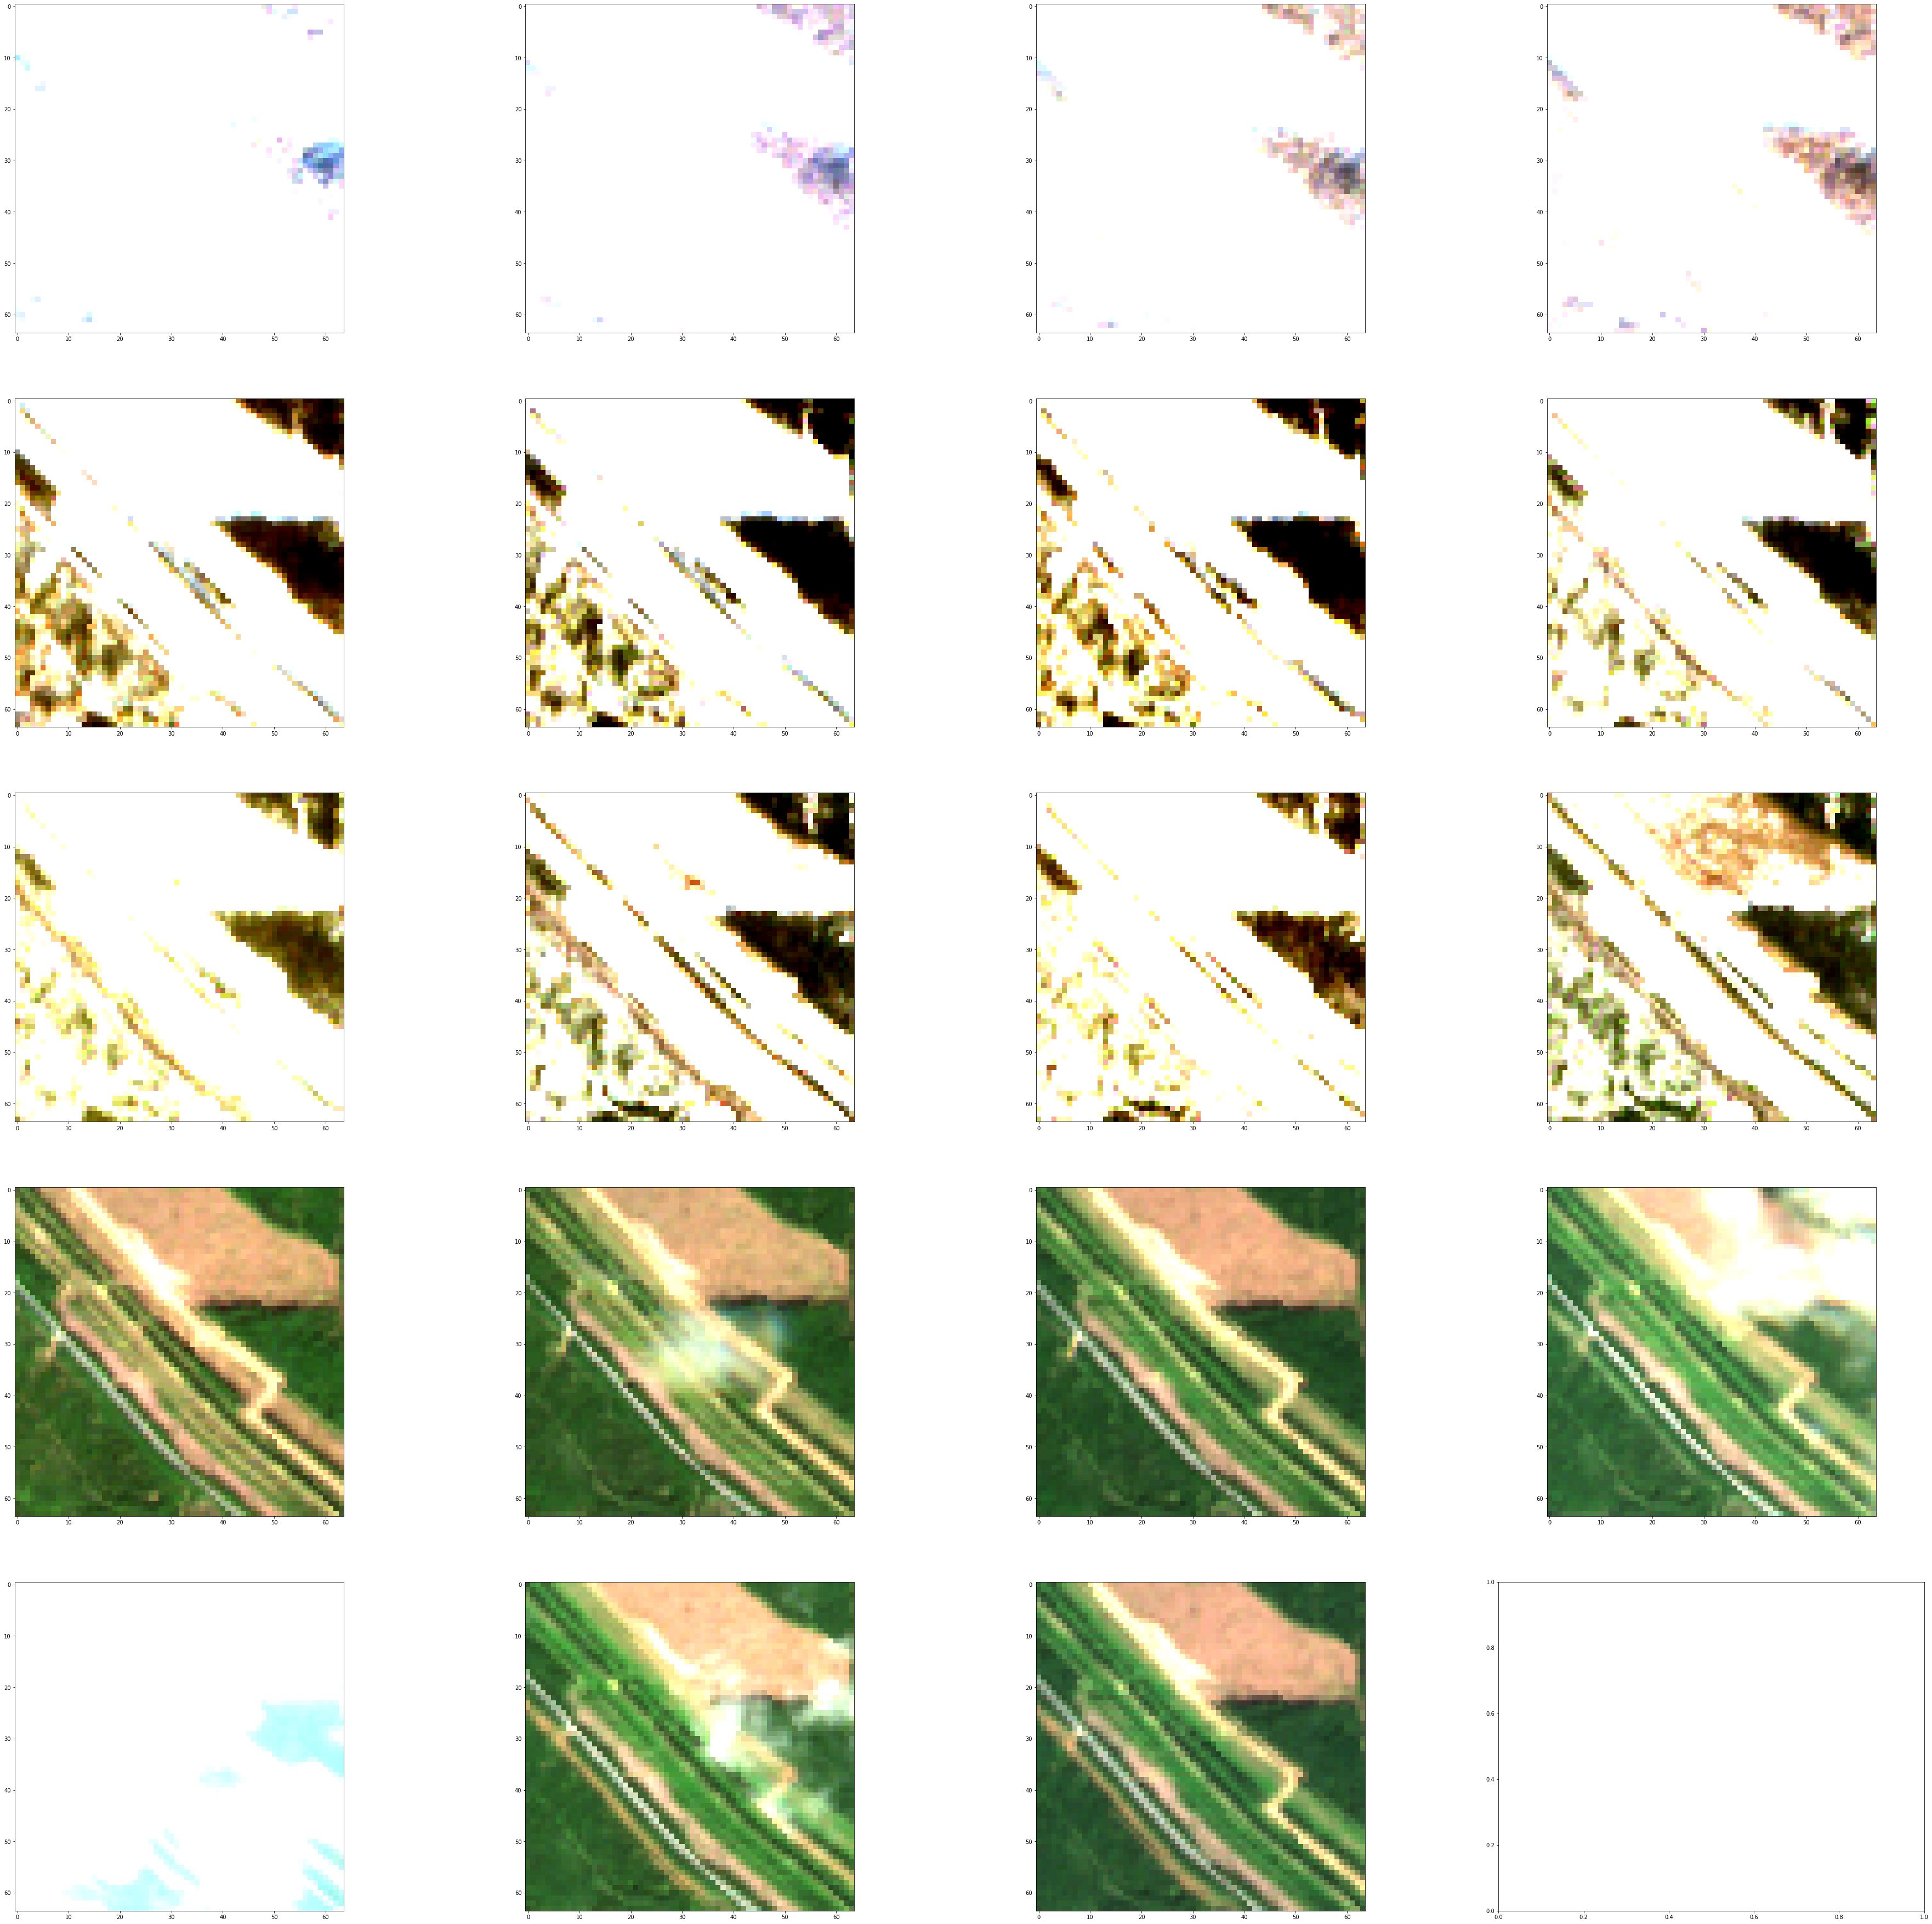

In [13]:


data_folder = os.path.join('..','tiler','data','2021H','patches', 'РН-НЯГНГ-2016-20')
eopatch = EOPatch.load(data_folder)
print(eopatch)

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(64,64))

k = 0
for i in range (5):
    for j in range(4):
        patch = np.clip(eopatch.data['L2A'][k][...,[3,2,1]], 0, 1)
        ax[i][j].imshow(patch, vmin=0, vmax=1)
        k = k + 1
        if k == 19:
            break
del eopatch

In [15]:
from eolearn.mask import AddValidDataMaskTask
def is_valid(eopatch):
    return eopatch.mask['IS_DATA'].astype(bool) & ~(eopatch.mask['CLM'].astype(bool))
add_valmask = AddValidDataMaskTask(predicate=is_valid, valid_data_feature='VALID_DATA')

In [16]:
eopatch_valid = add_valmask(eopatch)

eopatch_valid

EOPatch(
  data: {
    L2A: numpy.ndarray(shape=(19, 64, 64, 13), dtype=float32)
  }
  mask: {
    CLD: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    CLM: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    CLP: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    IS_DATA: numpy.ndarray(shape=(19, 64, 64, 1), dtype=bool)
    SCL: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    SNW: numpy.ndarray(shape=(19, 64, 64, 1), dtype=uint8)
    VALID_DATA: numpy.ndarray(shape=(19, 64, 64, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.05
    resolution: 10
    size_x: 64
    size_y: 64
    time_difference: datetime.timedelta(seconds=3600)
    time_interval: (datetime.datetime(2021, 1, 1, 0, 0), datetime.datetime(2021, 12, 31, 23, 59, 59))
  }
  bbox: BBox(((74.24258391419684, 62.93770001727495), (74.25504509880022, 62.94351081948182)), c

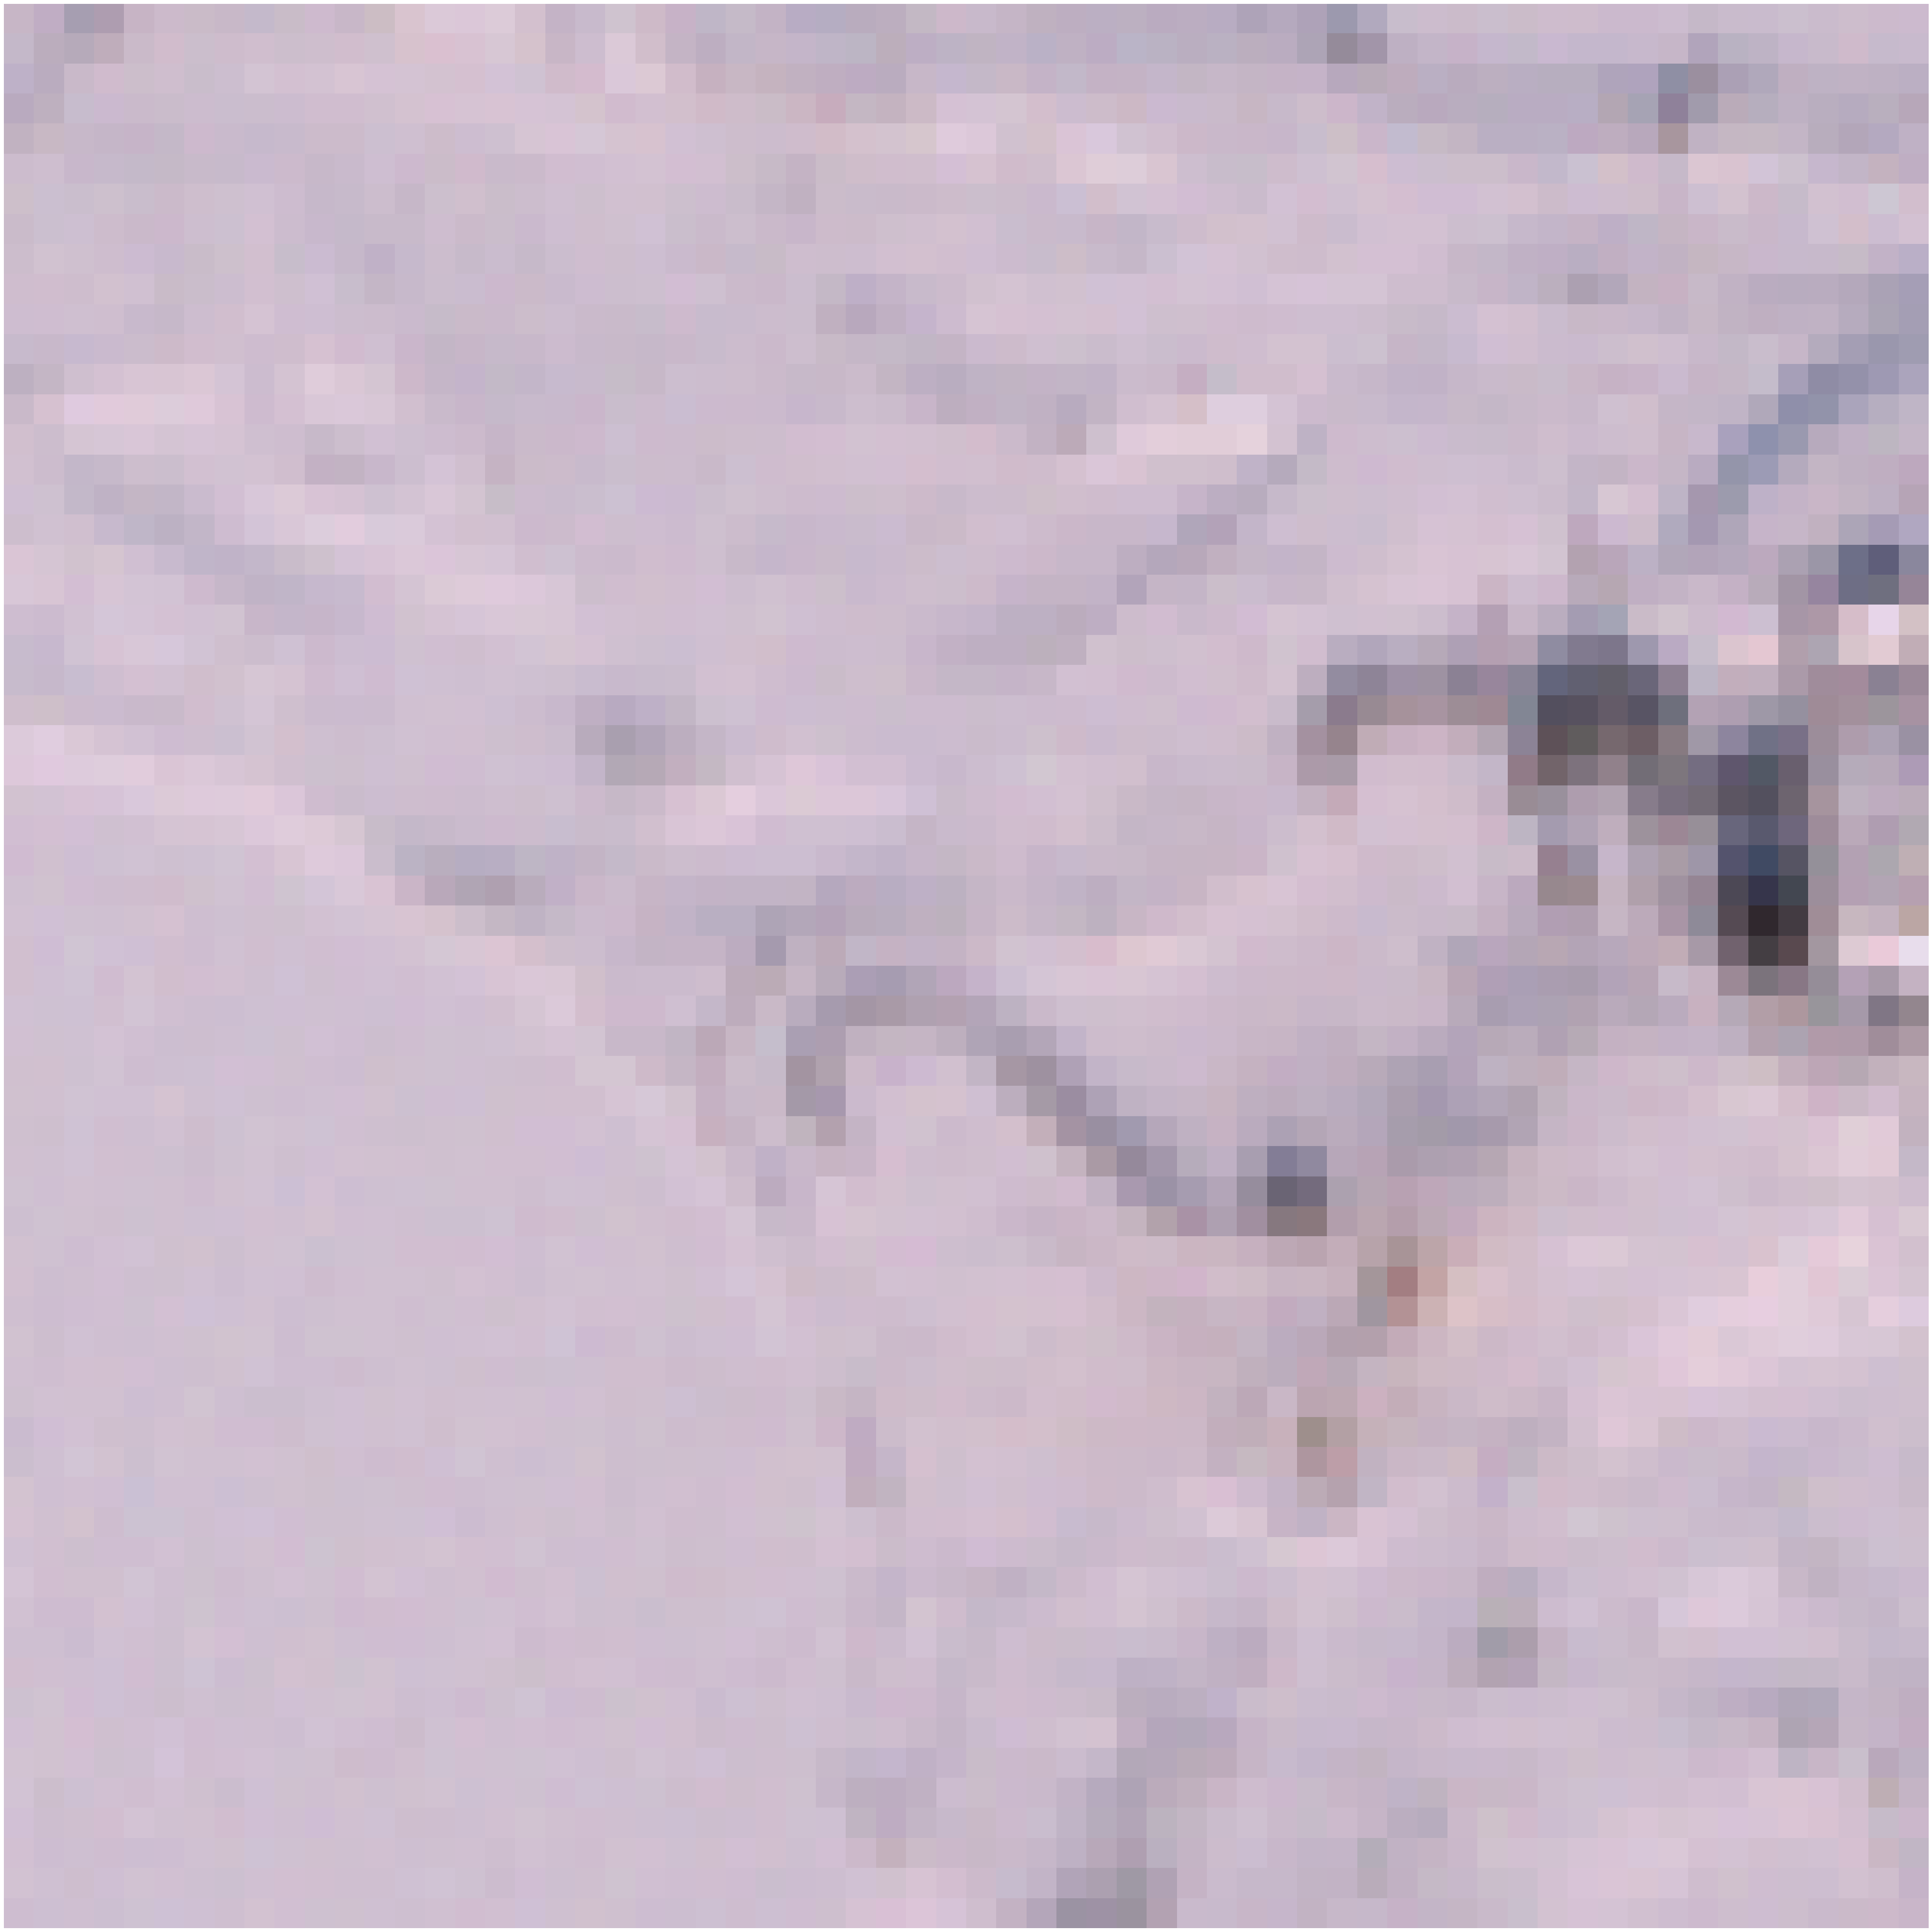

In [20]:
plt.figure(figsize=(64,64))
plt.imshow(np.clip(0.1*eopatch_valid.data['L2A'][1][...,[3,2,1]], 0, 1), vmin=0, vmax=1);
plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


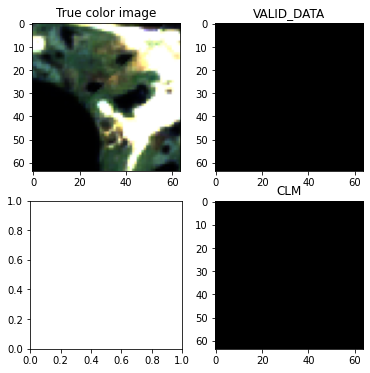

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
timestamp_idx = 10

ax[0][0].imshow(0.25*eopatch_valid.data['L2A'][timestamp_idx][...,[11,10,9]] * eopatch_valid.data['L2A'][timestamp_idx][...,[3,2,1]])
ax[0][0].set_title("True color image")

ax[0][1].imshow(np.squeeze(eopatch_valid.mask['VALID_DATA'][timestamp_idx]), cmap='gray')
ax[0][1].set_title("VALID_DATA")

ax[1][1].imshow(np.squeeze(eopatch_valid.mask['CLD'][timestamp_idx]), cmap='gray')
ax[1][1].set_title("CLD");

ax[1][1].imshow(np.squeeze(eopatch_valid.mask['CLM'][timestamp_idx]), cmap='gray')
ax[1][1].set_title("CLM");

In [ ]:
eopatch.plot((FeatureType.DATA, 'L2A'))

In [ ]:
import numpy as np, cv2
vis = 0.25*eopatch_valid.data['L2A'][timestamp_idx][...,[11,10,9]]

In [ ]:
h,w,c = vis.shape
print(h,w)

In [ ]:
vis2 = cv2.cvtColor(vis, cv2.COLOR_BGR2GRAY)
vis4 = vis2.ascontiguousarray()

In [ ]:
print(vis2)

In [ ]:
cv2.imwrite("im3.tiff",vis)

In [ ]:
vis5 = np.ravel(vis)

In [ ]:
print(vis)

In [ ]:
vis6 = np.ravel(vis5)
np.savez_compressed("test.npy.gz",vis6)